In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl


#For TF-IDF
import episcanpy as epi
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import seaborn as sns
from glob import iglob
import matplotlib as mpl
import skmisc



In [3]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/fetalSurgicalSubset/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bamnostic           NA
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
episcanpy           0.3.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jup

'/opt/conda/bin/python'

In [5]:
def identityTransfer(adata_CellsNewID, adata, field='identity'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

In [27]:
adata= sc.read('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata_20220523.h5ad')

In [23]:
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
#sc.pp.scale(adata, max_value=10)

normalizing counts per cell
    finished (0:00:01)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [28]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_10")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:19)


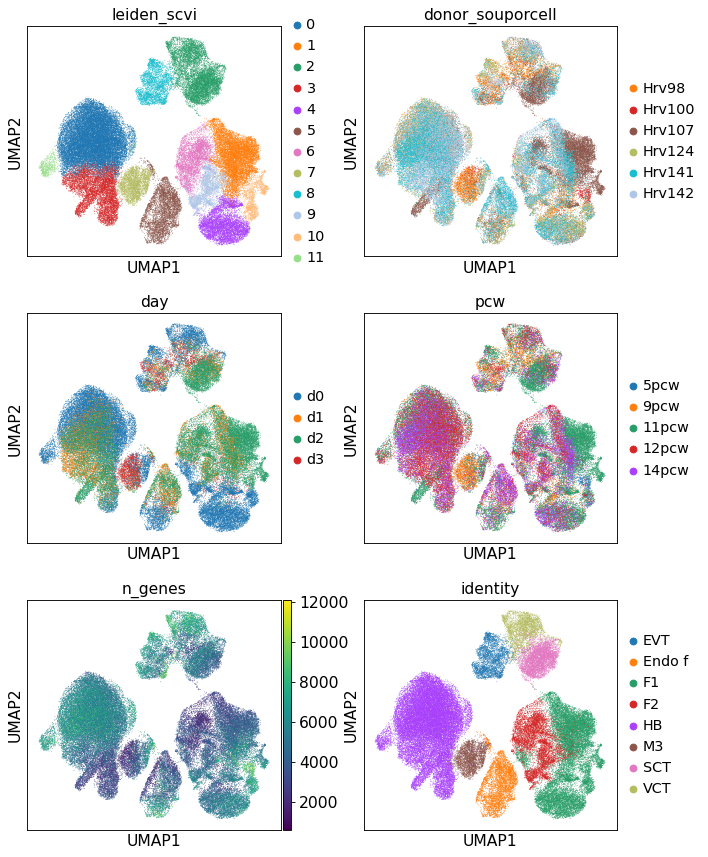

In [29]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:16)


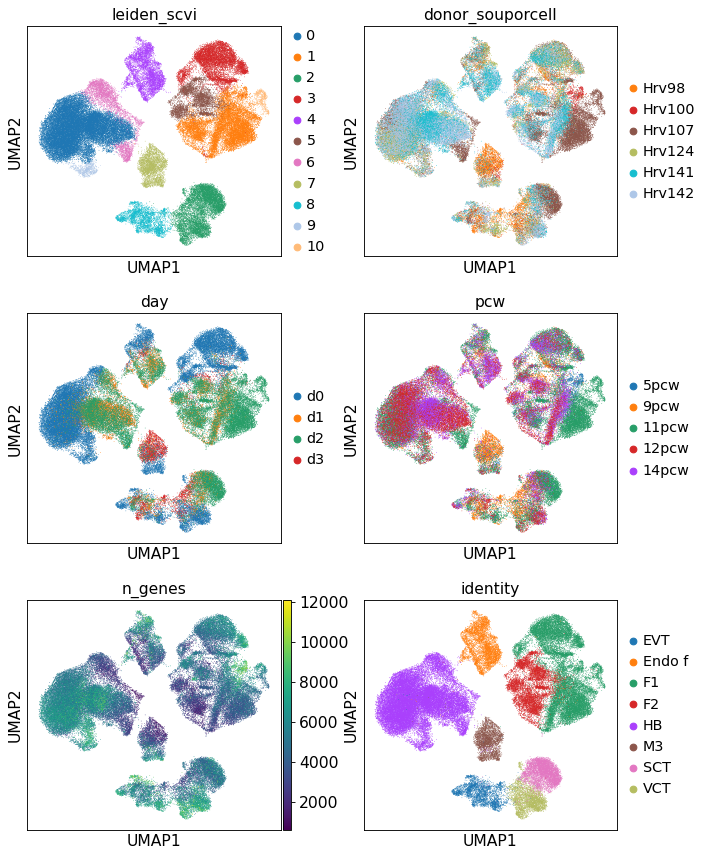

In [30]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

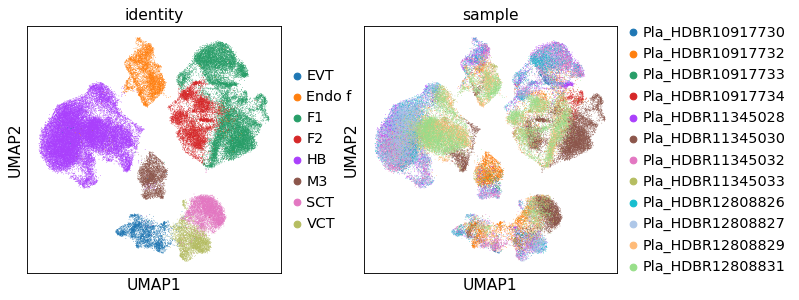

In [31]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity', 'sample' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:07)


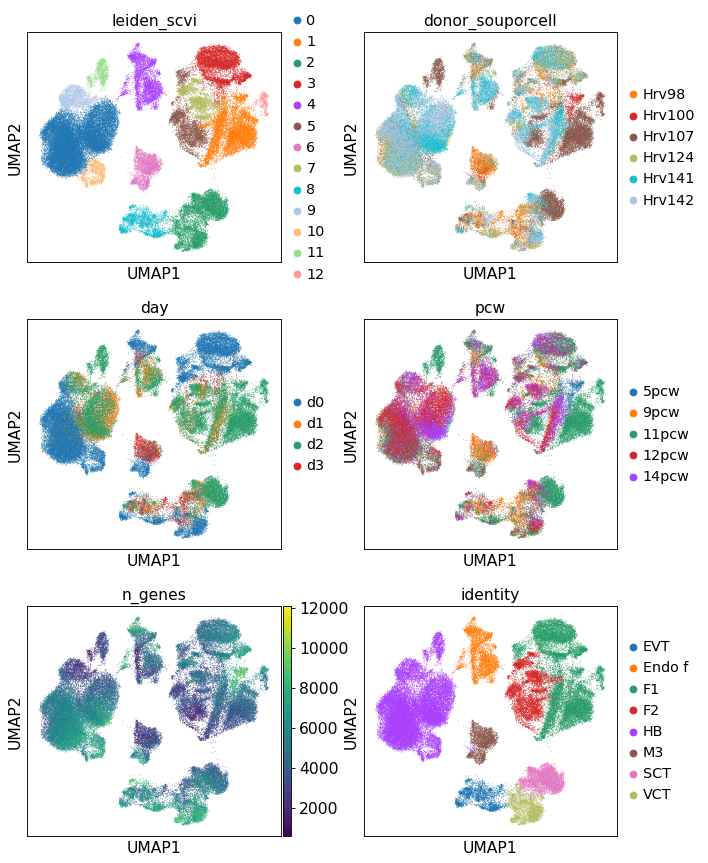

In [32]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_30")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

#### I will keep the Latent=20

In [33]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:39)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:15)


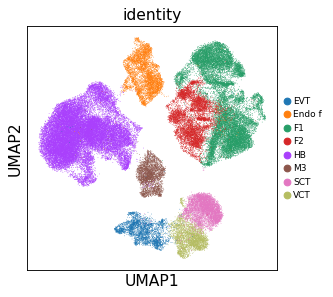

In [34]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_identity.pdf')#, save='_scVI_latent30_labTransfering.pdf')

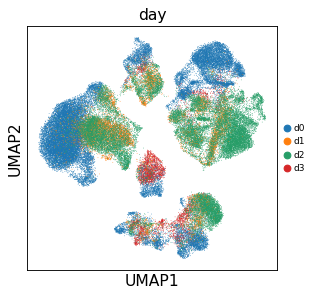

In [36]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['day' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_day.pdf')#, save='_scVI_latent30_labTransfering.pdf')

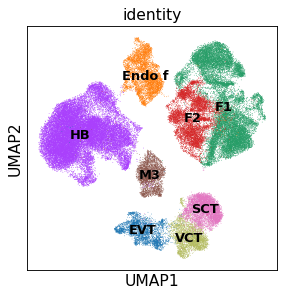

In [37]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ],legend_fontsize='small',legend_loc= 'on data',
           save='_scVI_latent20_fetal_identity_ondata.pdf')#, save='_scVI_latent30_labTransfering.pdf')

### Adding a column to metadata. Binary category for explant and D0

In [38]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
adata.obs['Tissue_type']= adata.obs['day']



#Function that changes the cluster names as indicated
adata.obs['Tissue_type'] = (adata.obs["Tissue_type"].map(lambda x: 
                            {"d0": "Fresh", "d1": "Explant", "d2": "Explant", "d3": "Explant"}
                            .get(x, x)).astype("category"))


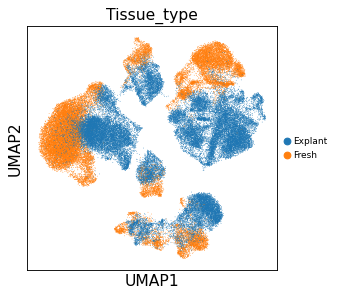

In [39]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['Tissue_type' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_TissueType.pdf')#, save='_scVI_latent30_labTransfering.pdf')

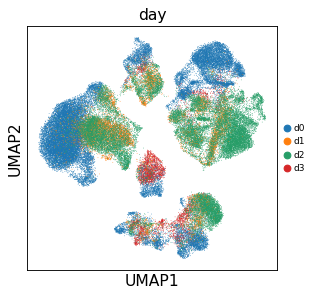

In [40]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['day' ],legend_fontsize='xx-small')#, save='_scVI_latent30_labTransfering.pdf')

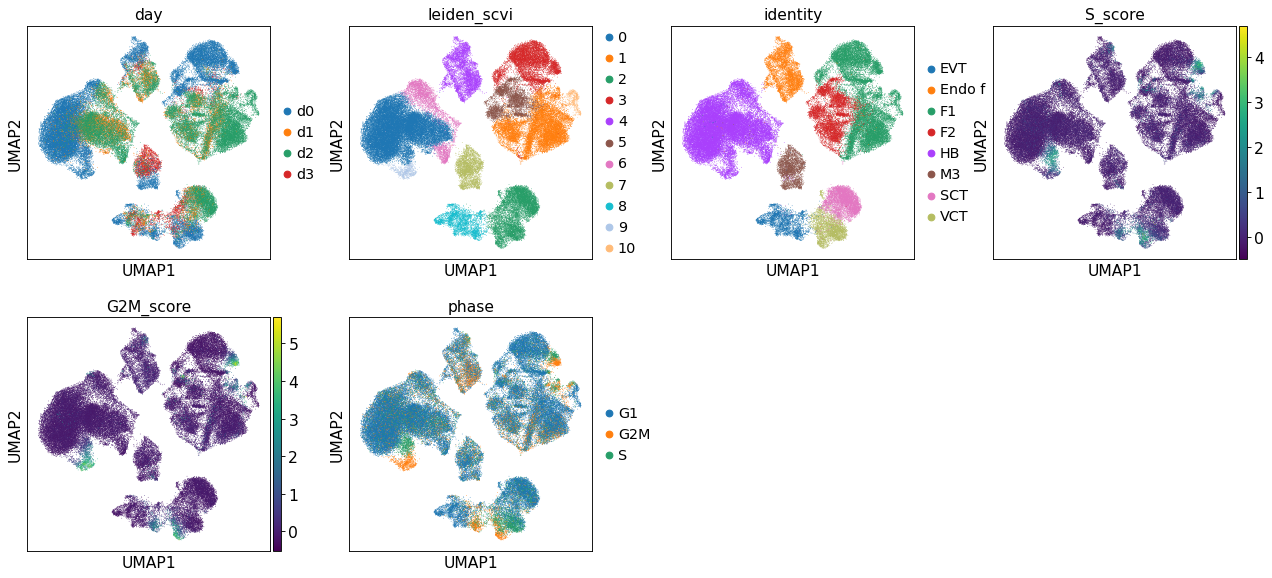

In [43]:
#clustering
sc.pl.umap(adata, color=['day', 'leiden_scvi','identity','S_score', 'G2M_score', 'phase'])

In [41]:
#Saving the modified object
adata.write('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_20220523.h5ad')

In [42]:
#Saving the modified object
adata=sc.read('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_20220523.h5ad')

In [44]:
adata

AnnData object with n_obs × n_vars = 72027 × 32743
    obs: 'sample', 'donor', 'termination', 'day', 'pcw', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'souporcell_id', 'donor_deconv', 'donor_souporcell', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'scrublet_doublet', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'souporcell_MFgenotype', 'identity', 'souporcell_MFidentity', 'Tissue_type'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'Tissue_type_colors', '_scvi', 'day_colors', 'donor_souporcell_colors', 'identity_colors', 'leiden', 'leiden_scvi_colors', 'neighbors', 'pcw_colors', 'sample_colors', 'umap', 'phase_colors'
    obsm: 'X_scVI_n_latent_10', 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_counts'
    obsp: 'conn

### Re-annotating the Fibroblast populations

I will explore the annotation reported by:

**Suryawanshi, H., et al. (2018). A single-cell survey of the human first-trimester placenta and decidua. Science advances, 4(10), eaau4788.** 

In [45]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'F1']
temp_cells2= adata[adata.obs['identity'] == 'F2']

Fibroblasts = temp_cells.concatenate(temp_cells2, index_unique=None)

In [46]:
del(temp_cells, temp_cells2)

In [47]:
Fibroblasts.obs['leiden_scvi2']= Fibroblasts.obs['leiden_scvi']

In [48]:
#LATENT 30
sc.pp.neighbors(Fibroblasts, n_neighbors=20, use_rep="X_scVI_n_latent_30")
sc.tl.umap(Fibroblasts)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:03)


In [51]:
#clustering
sc.tl.leiden(Fibroblasts, key_added="leiden_scvi", resolution=0.3)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:02)


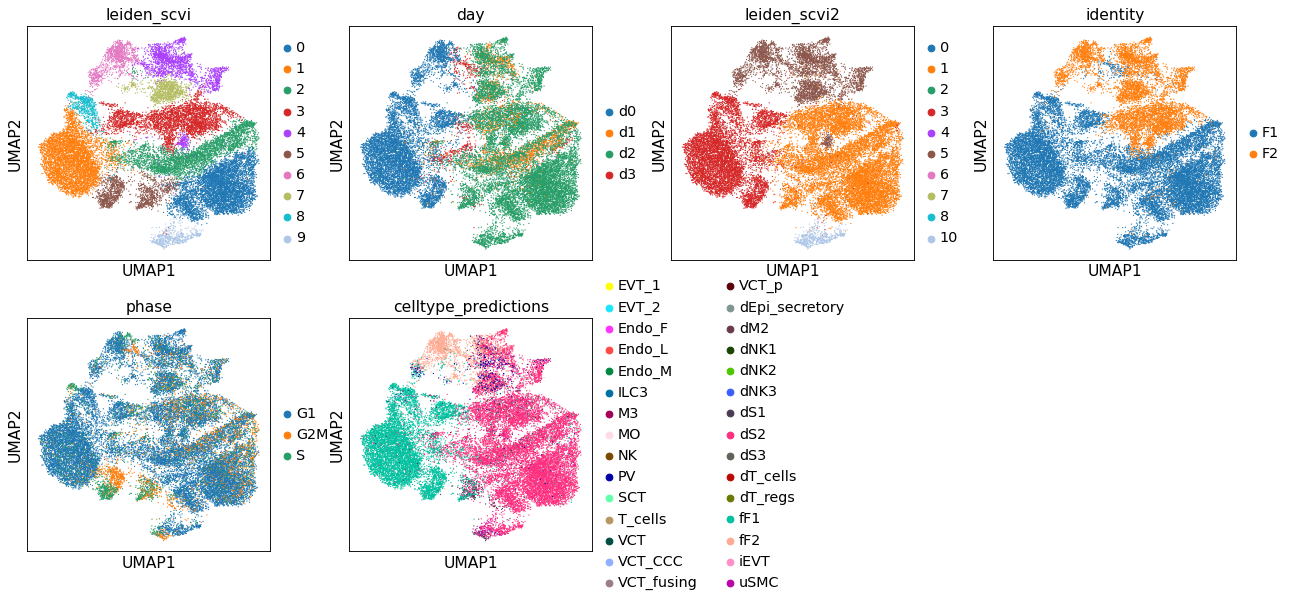

In [52]:

#clustering
sc.pl.umap(Fibroblasts, color=["leiden_scvi",'day', 'leiden_scvi2','identity','phase','celltype_predictions' ])

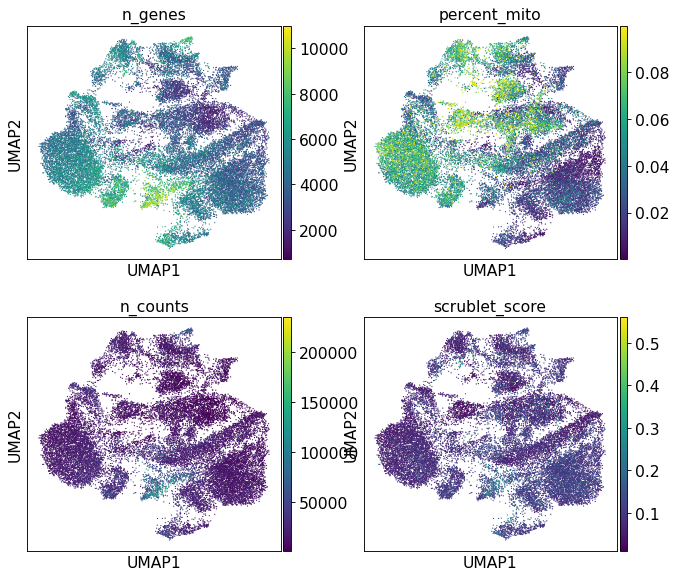

In [68]:
# use scVI imputed values for plotting
sc.pl.umap(Fibroblasts, color=["n_genes",'percent_mito','n_counts',
                         'scrublet_score' ], ncols=2)

##### NOTE :Clearly leiden_scvi c3 (leiden_scvi2 c9) are proliferative F1 fibroblasts

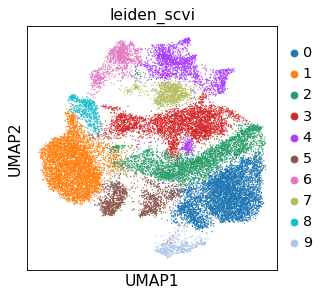

In [63]:

#clustering
sc.pl.umap(Fibroblasts, color=["leiden_scvi", ])

In [53]:
marker_genes = {
    'F1':{'COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'}, 
    'F2': {'REN', 'AGTR1', 'IGFBP7', 'AREG'},
    'F3':{'IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'},
}

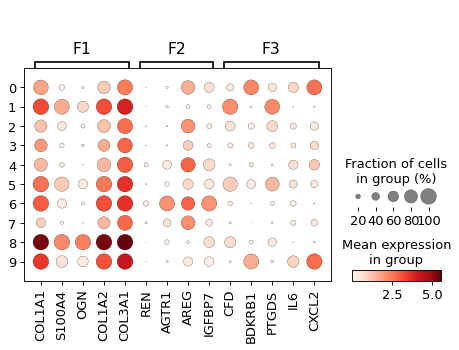

In [54]:
sc.pl.dotplot(Fibroblasts, marker_genes, groupby='leiden_scvi', use_raw=False)

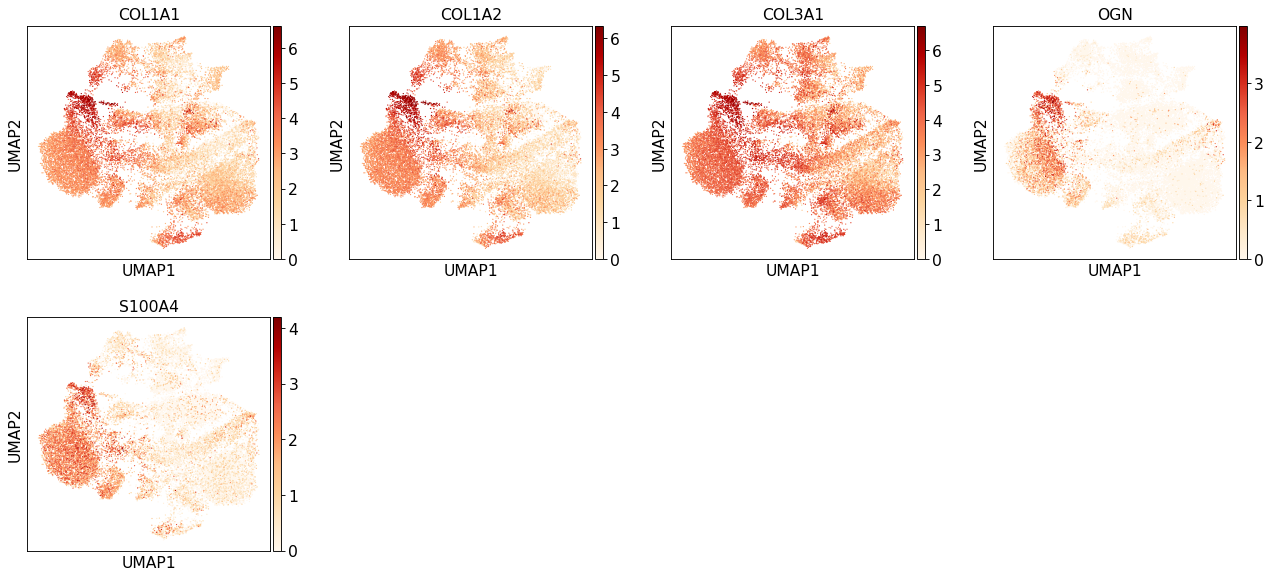

In [55]:
sc.pl.umap(Fibroblasts, color=['COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'], color_map='OrRd')

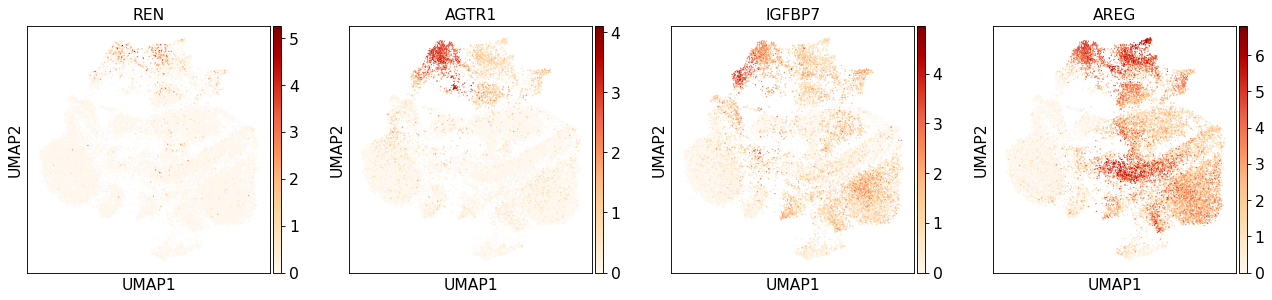

In [56]:
sc.pl.umap(Fibroblasts, color=['REN', 'AGTR1', 'IGFBP7', 'AREG'], color_map='OrRd')

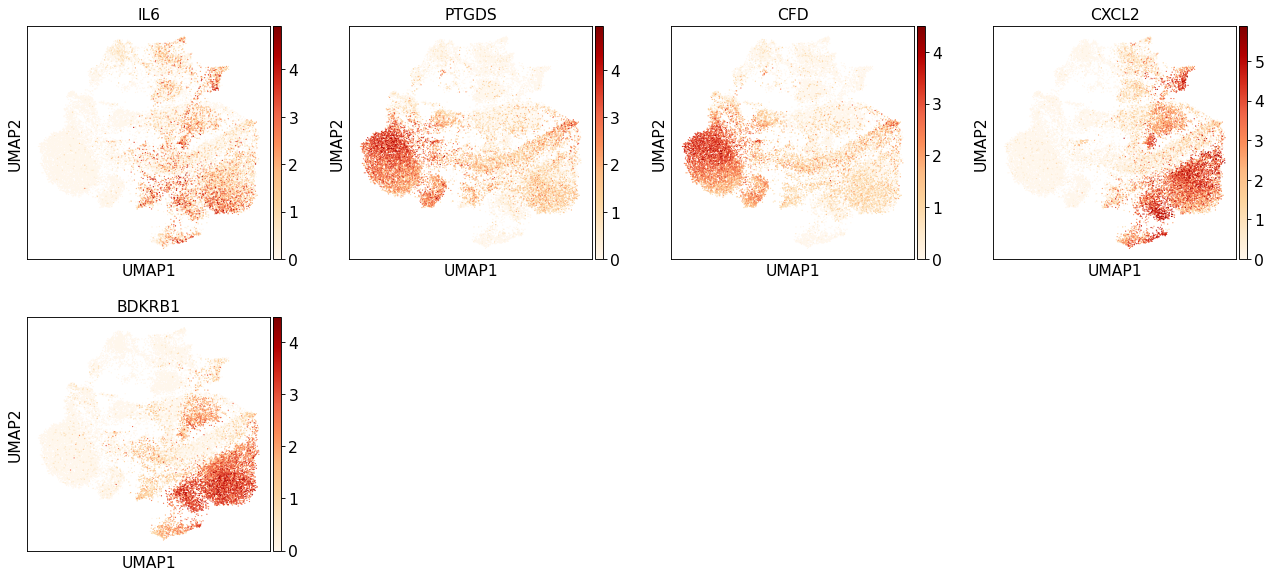

In [57]:
sc.pl.umap(Fibroblasts, color=['IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'], color_map='OrRd')

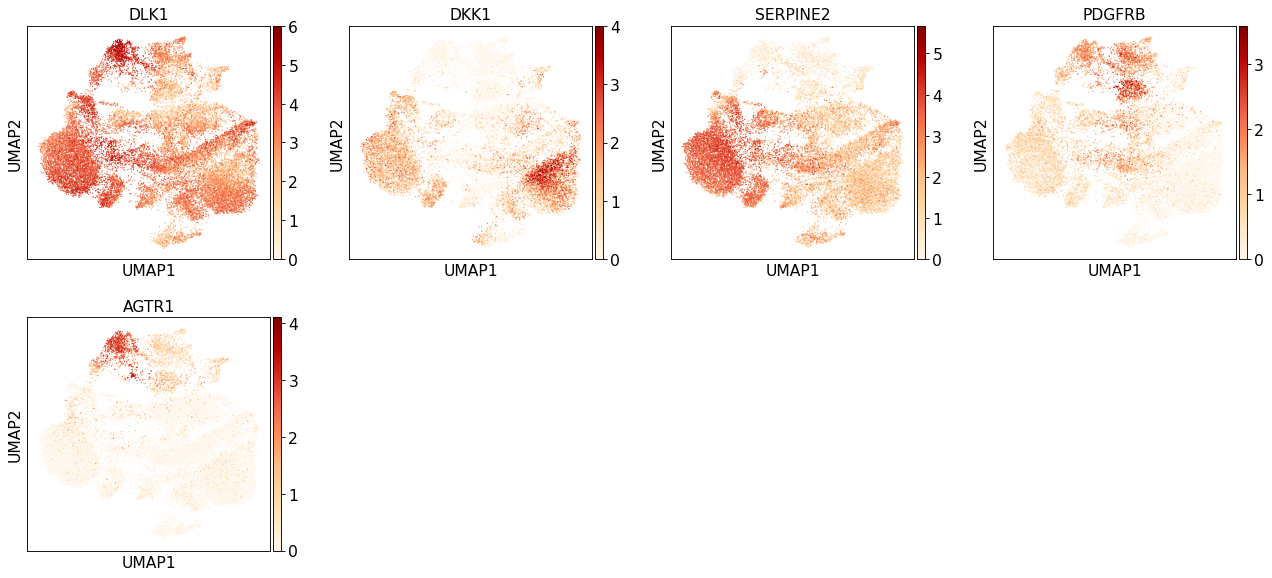

In [58]:
sc.pl.umap(Fibroblasts, color=['DLK1', 'DKK1','SERPINE2','PDGFRB','AGTR1'], color_map='OrRd')

* Vento-Tormo 2018 Fibroblasts differential markers

F1: DKK1, SERPINE2


F2: PDGFRB, AGTR1

In [59]:
marker_genesVento = {
    'F':{'DLK1', 'COL6A2'},
    'F1':{'DKK1', 'SERPINE2'}, 
    'F2': {'PDGFRB', 'AGTR1'}
}

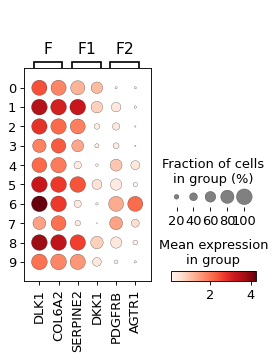

In [60]:
sc.pl.dotplot(Fibroblasts, marker_genesVento, groupby='leiden_scvi', use_raw=False)

##### *NOTE:*

##### F1 and F2 in both annotations correspon to the same populations. The F3 is basically only driven by inflammation.

Therefore it is confusing to use this annotation here as the explant cells are expressing inflammation traits.
I will just use the Vento-Tormo 2018 annotation

In [61]:
adata_counts = anndata.AnnData(X=Fibroblasts.raw.X, var=Fibroblasts.raw.var, obs=Fibroblasts.obs, asview=False)

# Binarize counts matrix (1 if expressed, 0 otherwise)
adata_bin = epi.pp.binarize(adata_counts, copy=True)
adata_bin.X.shape


# Compute TF-IDF
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape



(24127, 32743)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:00)


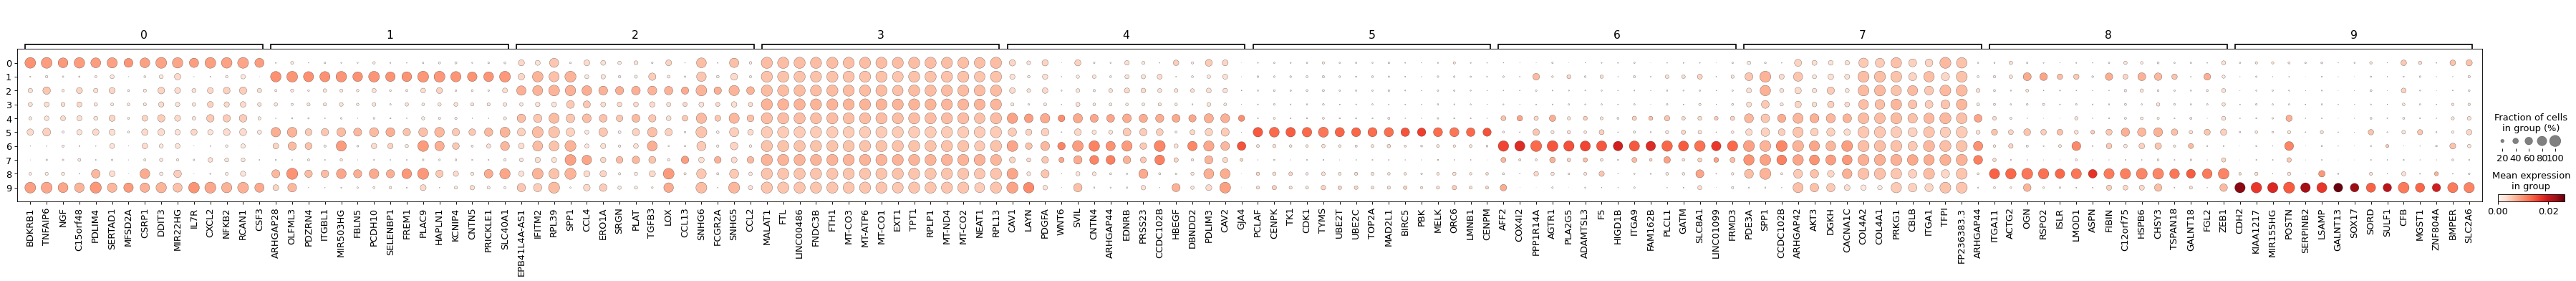

In [64]:

#Compute Mann-Withney test with scanpy
sc.tl.rank_genes_groups(adata_bin, groupby='leiden_scvi', use_raw=False, method='wilcoxon') #, method='logreg'



#Plot TF-IDF values
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=15, dendrogram=False, save='tfidf_scanpy.pdf')

In [70]:
sc.get.rank_genes_groups_df(adata_bin, group='5', pval_cutoff=0.001, log2fc_min=2).head(10)

names     scores  logfoldchanges  pvals  pvals_adj
0   PCLAF  44.547733        3.423073    0.0        0.0
1   CENPK  44.163868        2.949228    0.0        0.0
2     TK1  44.151268        3.321430    0.0        0.0
3    CDK1  43.136272        3.077823    0.0        0.0
4    TYMS  42.500557        2.596324    0.0        0.0
5   UBE2T  42.420273        3.256883    0.0        0.0
6   UBE2C  41.419140        3.280437    0.0        0.0
7   TOP2A  41.147667        3.099301    0.0        0.0
8  MAD2L1  41.011379        3.018559    0.0        0.0
9   BIRC5  40.896435        3.873579    0.0        0.0

##### NOTE: Cluster 5 are F1 expressing cell cycle /proliferation genes. I will name these cells as F1_p (F1 proliferative)

In [65]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
Fibroblasts.obs['identity']= Fibroblasts.obs['leiden_scvi']


#Function that changes the cluster names as indicated
Fibroblasts.obs['identity'] = (Fibroblasts.obs["leiden_scvi"].map(lambda x: 
                            {"0": "F1", "1": "F1", "2": "F1", "3": "F1", "4": "F2",
                             "5": "F1_p", "6": "F2", "7": "F2", "8": "F1", "9": "F1"}
                            .get(x, x)).astype("category"))

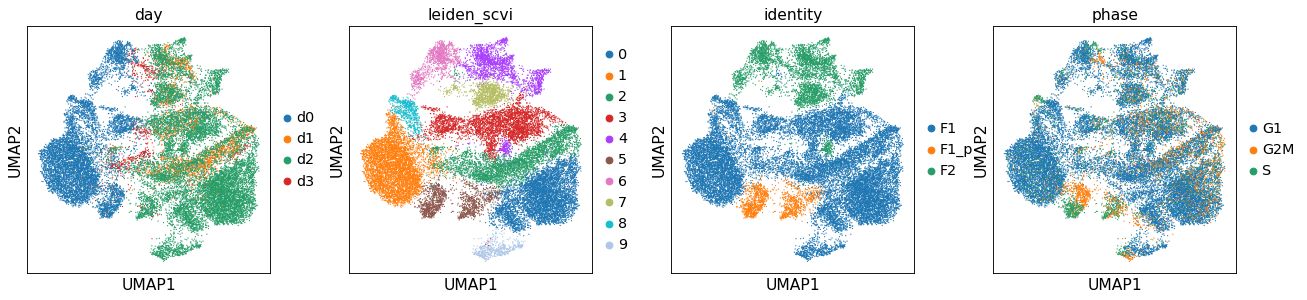

In [66]:

#clustering
sc.pl.umap(Fibroblasts, color=['day', 'leiden_scvi','identity','phase'])

In [71]:
#Assigning the old leiden cluster name to the original column. This to avoid confusions in the object
Fibroblasts.obs['leiden_scvi']= Fibroblasts.obs['leiden_scvi2']

#Removing the temp column that keep the old
Fibroblasts.obs= Fibroblasts.obs.drop(columns=['leiden_scvi2'])

In [72]:
adata= identityTransfer(Fibroblasts, adata)

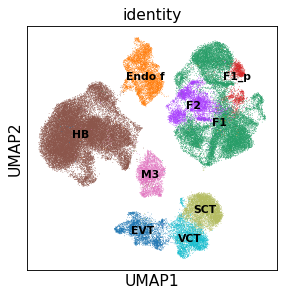

In [87]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ], legend_loc='on data',legend_fontsize='x-small')

In [88]:
#Saving the modified object
adata.write('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_20220523.h5ad')

### Plotting marker genes per population

In [74]:
marker_genes = {
    'F1':{'DKK1','SERPINE2'},
    'F':{'DLK1','COL6A2'},
    'F2': {'DLK1', 'AGTR1','PDGFRB'},
    'Endo f':{'PECAM1'}, #'LYVE1'
    'HB': {'CD14', 'FOLR2', 'LYVE1'},
    'M3':{"CD9", 'MMP9', 'IL1B'},
    'SCT':{'SDC1'},#EGFR
    'SCT & VCT':{'EGFR'},
    'VCT': {'PAGE4'},#EGFR, GATA3
    'EVT': {'GATA3',"HLA-G"} #'GATA3',
    
}

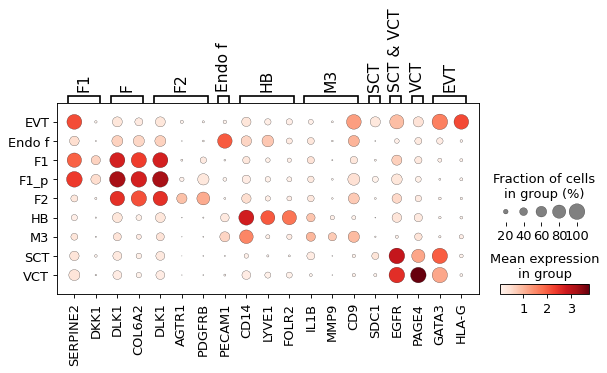

In [75]:
sc.pl.dotplot(adata, marker_genes, groupby='identity', use_raw=False)

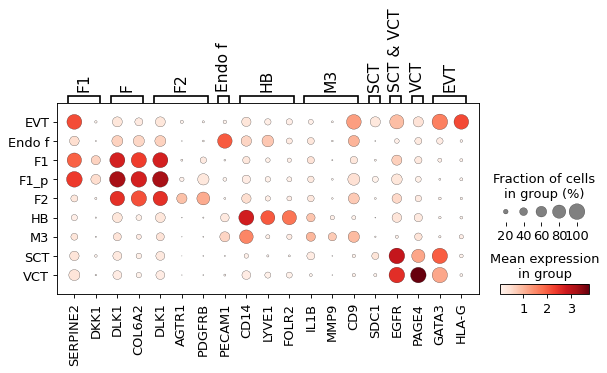

In [76]:
sc.pl.dotplot(adata, marker_genes, groupby='identity', use_raw=False,
              save='scVI_latent20_fetalSubset_identityMarkers.pdf')

In [77]:
del(Fibroblasts)

### Re-annotating the Trophoblast sub-populations

I will explore the annotation reported Anna Arutyunyan:

 

In [78]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'SCT']
temp_cells2= adata[adata.obs['identity'] == 'VCT']
temp_cells3= adata[adata.obs['identity'] == 'EVT']

Trophoblasts = temp_cells.concatenate(temp_cells2, temp_cells3, index_unique=None)

In [79]:
del(temp_cells, temp_cells2, temp_cells3)

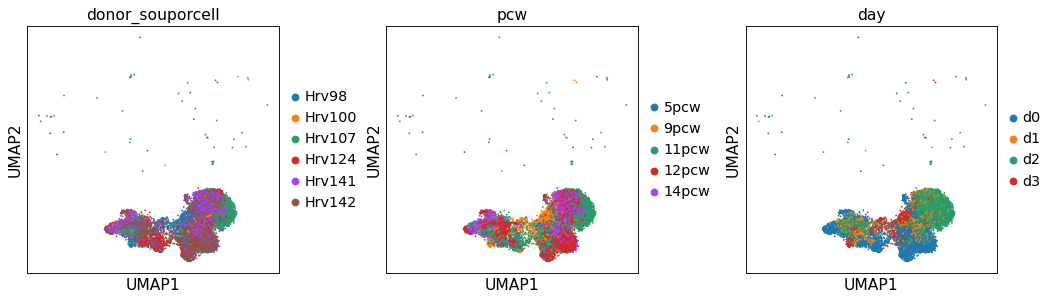

In [81]:
sc.pl.umap(Trophoblasts, color=['donor_souporcell', 'pcw','day'], color_map='OrRd',wspace=0.3)

In [82]:
Trophoblasts.obs['leiden_scvi2']= Trophoblasts.obs['leiden_scvi']

In [83]:
#LATENT 30
sc.pp.neighbors(Trophoblasts, n_neighbors=15, use_rep="X_scVI_n_latent_20")
sc.tl.umap(Trophoblasts)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


running Leiden clustering
    finished: found 11 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:01)


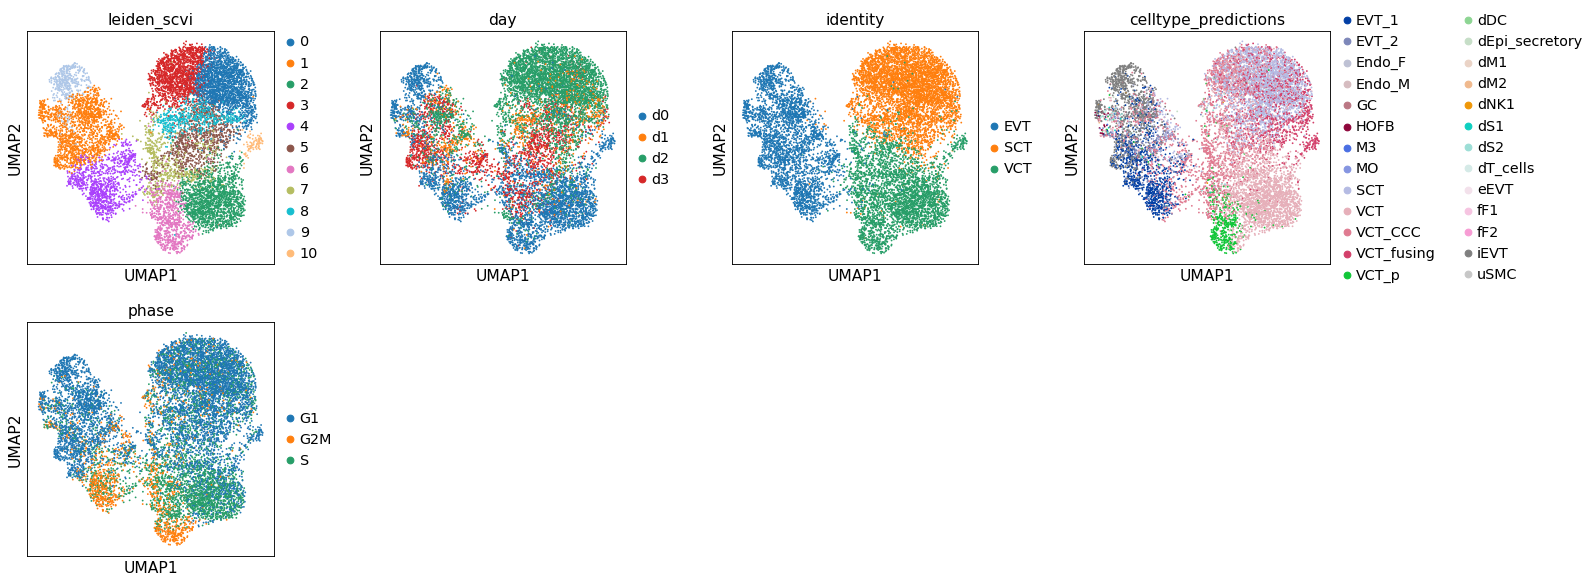

In [85]:
#clustering
sc.tl.leiden(Trophoblasts, key_added="leiden_scvi", resolution=0.6)


sc.pl.umap(Trophoblasts, color=["leiden_scvi",'day', 'identity','celltype_predictions','phase'],wspace=0.3,)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:00)


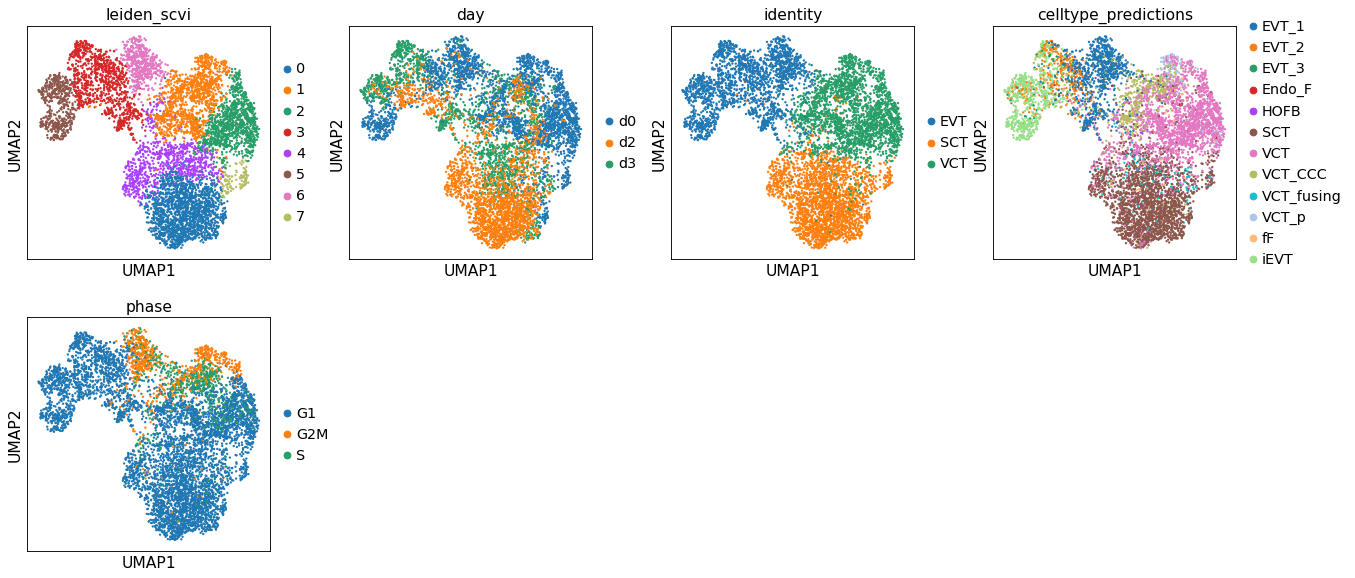

In [165]:
#clustering
sc.tl.leiden(Trophoblasts, key_added="leiden_scvi", resolution=0.5)


sc.pl.umap(Trophoblasts, color=["leiden_scvi",'day', 'identity','celltype_predictions','phase' ])

In [86]:
#Saving the modified object
Trophoblasts.write('../results/scVI/S9_scVIintegrated_Trophoblasts_latent20_20220523.h5ad')

In [178]:
#Trophoblasts=sc.read('../results/scVI/S9_scVIintegrated_Trophoblasts_latent30.h5ad')